In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "shopping_behavior_updated.csv"
df = pd.read_csv(file_path)

# Display basic information and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

(None,
    Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
 0            1   55   Male         Blouse  Clothing                     53   
 1            2   19   Male        Sweater  Clothing                     64   
 2            3   50   Male          Jeans  Clothing                     73   
 3            4   21   Male        Sandals  Footwear                     90   
 4            5   45   Male         Blouse  Clothing                     49   
 
         Location Size      Color  Season  Review Rating Subscription Status  \
 0       Kentucky    L       Gray  Winter            3.1                 Yes   
 1          Maine    L     Maroon  Winter            3.1                 Yes   
 2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
 3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
 4         Oregon    M  Turquoise  Spring            2.7                 Yes   
 
    Shipping Type Discount Applied 

<Figure size 1200x600 with 0 Axes>

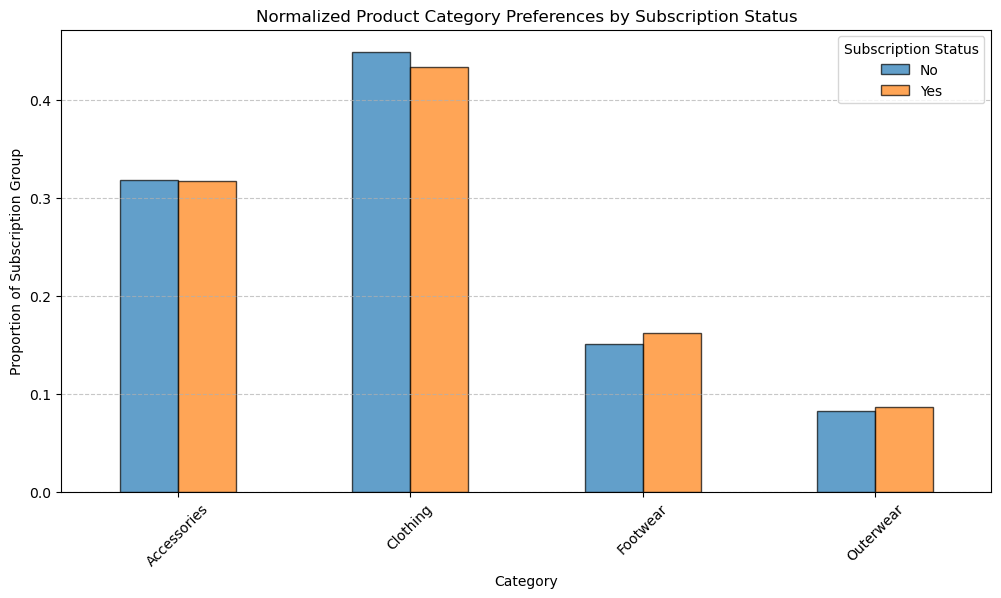

<Figure size 1200x600 with 0 Axes>

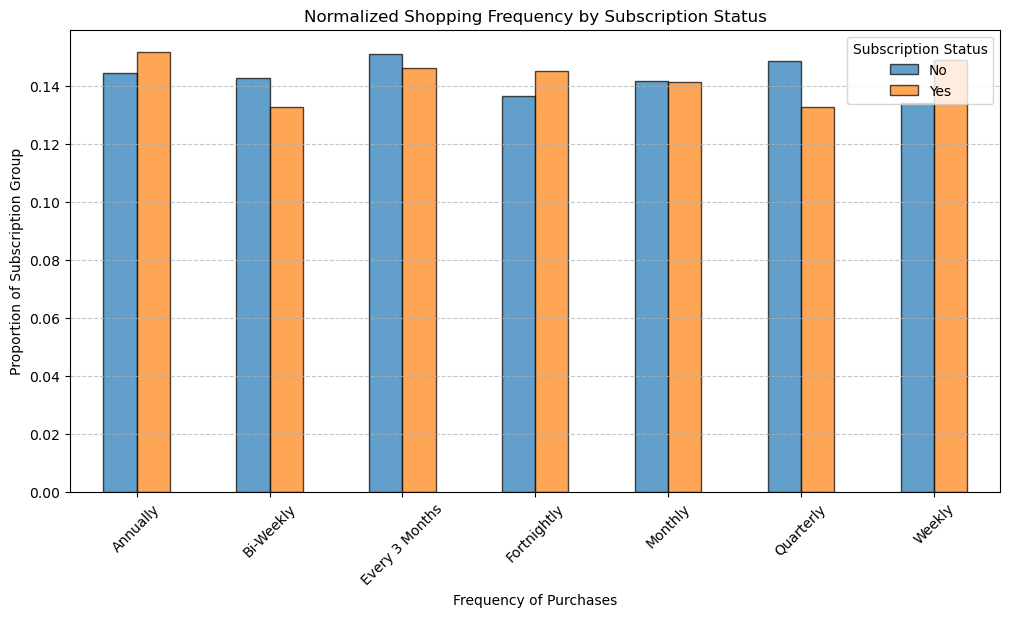

<Figure size 1000x600 with 0 Axes>

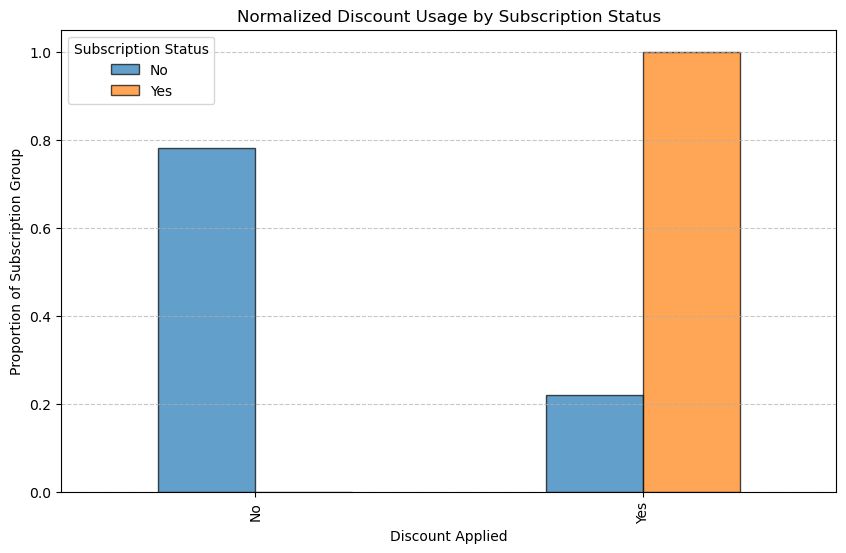

<Figure size 1200x600 with 0 Axes>

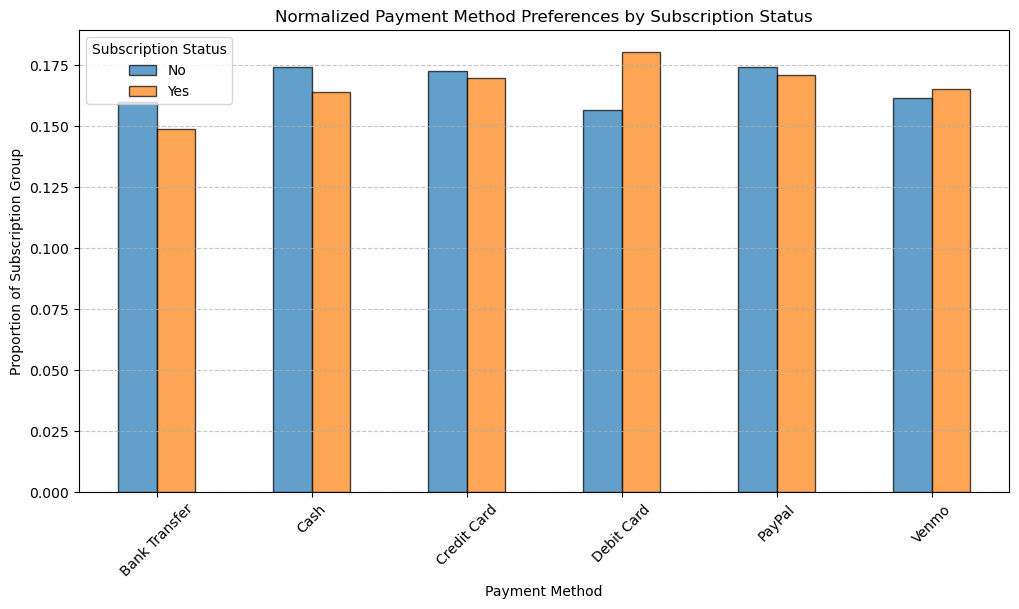

In [8]:
# Get the total count for each subscription status for normalization
subscription_counts = df["Subscription Status"].value_counts()

# Function to normalize counts by subscription status proportion
def normalize_by_subscription(column):
    return df.groupby(["Subscription Status", column]).size().unstack().div(subscription_counts, axis=0)

# 1. Normalized Product Category Preferences by Subscription Status
plt.figure(figsize=(12, 6))
normalize_by_subscription("Category").T.plot(kind="bar", figsize=(12, 6), edgecolor='black', alpha=0.7)
plt.xlabel("Category")
plt.ylabel("Proportion of Subscription Group")
plt.title("Normalized Product Category Preferences by Subscription Status")
plt.xticks(rotation=45)
plt.legend(title="Subscription Status")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Normalized Shopping Frequency by Subscription Status
plt.figure(figsize=(12, 6))
normalize_by_subscription("Frequency of Purchases").T.plot(kind="bar", figsize=(12, 6), edgecolor='black', alpha=0.7)
plt.xlabel("Frequency of Purchases")
plt.ylabel("Proportion of Subscription Group")
plt.title("Normalized Shopping Frequency by Subscription Status")
plt.xticks(rotation=45)
plt.legend(title="Subscription Status")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Normalized Discount Usage by Subscription Status
plt.figure(figsize=(10, 6))
normalize_by_subscription("Discount Applied").T.plot(kind="bar", figsize=(10, 6), edgecolor='black', alpha=0.7)
plt.xlabel("Discount Applied")
plt.ylabel("Proportion of Subscription Group")
plt.title("Normalized Discount Usage by Subscription Status")
plt.legend(title="Subscription Status")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Normalized Payment Method Preferences by Subscription Status
plt.figure(figsize=(12, 6))
normalize_by_subscription("Payment Method").T.plot(kind="bar", figsize=(12, 6), edgecolor='black', alpha=0.7)
plt.xlabel("Payment Method")
plt.ylabel("Proportion of Subscription Group")
plt.title("Normalized Payment Method Preferences by Subscription Status")
plt.xticks(rotation=45)
plt.legend(title="Subscription Status")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
